In [41]:
#make some very import stuff

import numpy as np
import oddt
import matplotlib
from matplotlib import pyplot as plt
from oddt.interactions import (close_contacts, hbonds, hydrophobic_contacts, pi_cation, pi_stacking, salt_bridges)


#handy function to automatize hbond identification 
def hbonds_identifier(protein, ligand):
    
    '''
    input: protein obj and ligand obj from oddt
    return: a list containing [residue's number, residue's name, residue's atomtype, ligand's atomtype,
    ligand's atom nunmber]
    '''    
    t = []
    protein_atoms, ligand_atoms, strict = hbonds(protein, ligand)
    for i in range(len(protein_atoms['resnum'])):
        t.append((protein_atoms['resnum'][i],protein_atoms['resname'][i],protein_atoms['atomtype'][i], ligand_atoms['atomtype'][i], ligand_atoms['id'][i]))
    return(t)


#handy function to automatize hydrophobic contact identification 
def hydrophobics_identifier(protein, ligand):
    
    '''
    input: protein obj and ligand obj from oddt
    return: a list containing [residue's number, residue's name, residue's atomtype, ligand's atomtype,
    ligand's atom nunmber]
    '''
    t = []
    protein_atoms, ligand_atoms = hydrophobic_contacts(protein, ligand)
    for i in range(len(protein_atoms['resnum'])):
        t.append((protein_atoms['resnum'][i],protein_atoms['resname'][i],protein_atoms['atomtype'][i], ligand_atoms['atomtype'][i], ligand_atoms['id'][i]))
    return(t)


#return a binary list containing 1 if the interacting residue of  ligand is in the reference array
def feature_count(interaction_array, reference_array):

    '''
    Input: interaction_array = a list of residues interacting with a ligand
            reference_array = a non redundant list of all the residues interacting with all the ligands
    return: a binary array where 1 indicate that a residues is found in the interaction array, else 0
    '''
    
    feature_count = []
    for tupla in reference_array:
        print(tupla)
        if tupla in interaction_array:
            feature_count.append(1)
        else:
            feature_count.append(0)
    return feature_count

In [ ]:
#proteins loading as oddt obj
protein_2JBL = next(oddt.toolkit.readfile('pdb', '/home/gabriele/Documenti/vincent/2JBL/protein.pdb'))
protein_2JBL.protein = True
protein_5PRC = next(oddt.toolkit.readfile('pdb', '/home/gabriele/Documenti/vincent/5PRC/protein.pdb'))
protein_5PRC.protein = True
protein_1DXR = next(oddt.toolkit.readfile('pdb', '/home/gabriele/Documenti/vincent/1DXR/protein.pdb'))
protein_1DXR.protein = True

#ligands import as oddt obj
SMA = next(oddt.toolkit.readfile('pdb', '/home/gabriele/Documenti/vincent/2JBL/SMA.pdb'))
ATZ = next(oddt.toolkit.readfile('pdb', '/home/gabriele/Documenti/vincent/5PRC/ATZ.pdb'))
MST = next(oddt.toolkit.readfile('pdb', '/home/gabriele/Documenti/vincent/1DXR/MST.pdb'))

(223, 'SER')
(222, 'TYR')
(190, 'HIS')
(223, 'SER')
(222, 'TYR')
(190, 'HIS')
(223, 'SER')
(222, 'TYR')
(190, 'HIS')
(216, 'PHE')
(220, 'VAL')
(212, 'GLU')
(189, 'LEU')
(232, 'LEU')
(229, 'ILE')
(193, 'LEU')
(222, 'TYR')
(216, 'PHE')
(220, 'VAL')
(212, 'GLU')
(189, 'LEU')
(232, 'LEU')
(229, 'ILE')
(193, 'LEU')
(222, 'TYR')
(216, 'PHE')
(220, 'VAL')
(212, 'GLU')
(189, 'LEU')
(232, 'LEU')
(229, 'ILE')
(193, 'LEU')
(222, 'TYR')


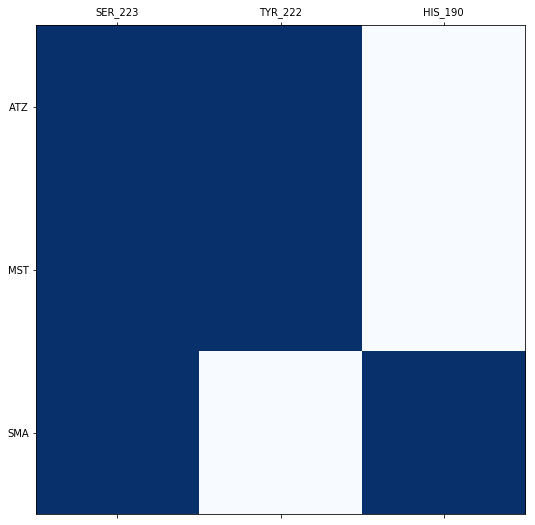

In [42]:
#hbonds calculation
hbonds_sma = hbonds_identifier(protein_2JBL, SMA)
hbonds_atz = hbonds_identifier(protein_5PRC, ATZ)
hbonds_mst = hbonds_identifier(protein_1DXR, MST)

#hydrophobic contacts calculation
hydrophobic_sma = hydrophobics_identifier(protein_2JBL, SMA)
hydrophobic_atz = hydrophobics_identifier(protein_5PRC, ATZ)
hydrophobic_mst = hydrophobics_identifier(protein_1DXR, MST)

#retrieving only resid and resname for hbonds
SMA_hb = [(x[0],x[1]) for x in hbonds_sma]
MST_hb = [(x[0],x[1]) for x in hbonds_mst]
atz_hb = [(x[0],x[1]) for x in hbonds_atz]
hbs = SMA_hb + MST_hb + atz_hb
hbs = list(set(hbs))

#retrieving only resid and resname for hydrophobic
SMA_hc = [(x[0],x[1]) for x in hydrophobic_sma]
MST_hc = [(x[0],x[1]) for x in hydrophobic_mst]
atz_hc = [(x[0],x[1]) for x in hydrophobic_atz]
hc = SMA_hc + MST_hc + atz_hc
hc = list(set(hc))

#binary arrays retrieving for hbonds
SMA_FC = feature_count(set(SMA_hb), hbs)
MST_FC = feature_count(set(MST_hb), hbs)
ATZ_FC = feature_count(set(atz_hb), hbs)

#binary matrix for hbonds
narray_hbs = np.array([SMA_FC, MST_FC, ATZ_FC])

#binary arrays retrieving for hydrophobic
SMA_FC = feature_count(set(SMA_hc), hc)
MST_FC = feature_count(set(MST_hc), hc)
ATZ_FC = feature_count(set(atz_hc), hc)

#binary matrix for hydrophobic
narray_hc = np.array([SMA_FC, MST_FC, ATZ_FC])

#taking in consideration the offset in residues numeration
last_hbs = ["{1}_{0}".format(x[0], x[1]) for x in hbs]
last_hc = ["{1}_{0}".format(x[0], x[1]) for x in hc]

#y axis label, the name of the ligand
compounds = ['SMA','MST','ATZ']

#plot the features presence matrix
#firstly for hbonds
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
intersection_matrix = narray_hbs
ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(narray_hbs.shape[1]), minor=False)
ax.set_yticks(np.arange(narray_hbs.shape[0]), minor=False)
ax.invert_yaxis()

#labels
ax.set_xticklabels(last_hbs, minor=False)
ax.set_yticklabels(compounds, minor=False)
plt.show()

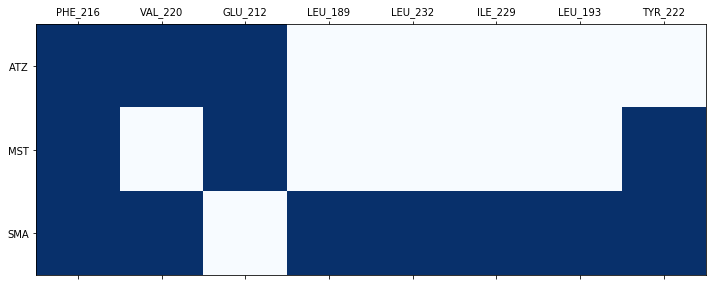

In [43]:
#then for hydrophobic contacts
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
intersection_matrix = narray_hc
ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(narray_hc.shape[1]), minor=False)
ax.set_yticks(np.arange(narray_hc.shape[0]), minor=False)
ax.invert_yaxis()

#labels
ax.set_xticklabels(last_hc, minor=False)
ax.set_yticklabels(compounds, minor=False)
plt.show()

In [34]:
hbonds_sma

[(191, 'HIS', 'N.ar', 'O.2', 31),
 (224, 'SER', 'O.2', 'O.2', 34),
 (224, 'SER', 'O.2', 'O.3', 33),
 (224, 'SER', 'O.2', 'O.2', 34)]

In [35]:
hbonds_atz

[(223, 'TYR', 'O.2', 'N.3', 7),
 (224, 'SER', 'O.2', 'N.3', 5),
 (224, 'SER', 'O.2', 'N.3', 11)]

In [36]:
hbonds_mst

[(223, 'TYR', 'O.2', 'N.3', 6), (224, 'SER', 'O.2', 'N.3', 13)]

In [71]:
protein_2J8C = next(oddt.toolkit.readfile('pdb', '/home/gabriele/Documenti/vincent/2J8C/protein.pdb'))
protein_2J8C.protein = True
Q2D = next(oddt.toolkit.readfile('pdb', '/home/gabriele/Documenti/vincent/2J8C/Q2_distal.pdb'))
Q2P = next(oddt.toolkit.readfile('pdb', '/home/gabriele/Documenti/vincent/2J8C/Q2_proximal.pdb'))

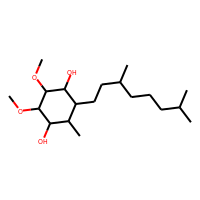

In [74]:
Q2P

In [44]:
hbonds_q2p = hbonds_identifier(protein_2J8C, Q2P)
hydrophobic_q2p = hydrophobics_identifier(protein_2J8C, Q2P)
q2p_hb = [(x[0],x[1]) for x in hbonds_q2p]
q2p_hc = [(x[0],x[1]) for x in hydrophobic_q2p]
hbonds_q2d = hbonds_identifier(protein_2J8C, Q2D)
hydrophobic_q2d = hydrophobics_identifier(protein_2J8C, Q2D)
q2d_hb = [(x[0],x[1]) for x in hbonds_q2d]
q2d_hc = [(x[0],x[1]) for x in hydrophobic_q2d]

In [49]:
hbs = SMA_hb + MST_hb + atz_hb + q2p_hb + q2d_hb
hbs = list(set(hbs))

hc = SMA_hc + MST_hc + atz_hc + q2p_hc + q2d_hc
hc = list(set(hc))

SMA_FC = feature_count(set(SMA_hb), hbs)
MST_FC = feature_count(set(MST_hb), hbs)
ATZ_FC = feature_count(set(atz_hb), hbs)
Q2P_FC = feature_count(set(q2p_hb), hbs)
Q2D_FC = feature_count(set(q2d_hb), hbs)
narray_hbs = np.array([SMA_FC, MST_FC, ATZ_FC, Q2P_FC, Q2D_FC])

SMA_FC = feature_count(set(SMA_hc), hc)
MST_FC = feature_count(set(MST_hc), hc)
ATZ_FC = feature_count(set(atz_hc), hc)
Q2P_FC = feature_count(set(q2p_hc), hc)
Q2D_FC = feature_count(set(q2d_hc), hc)
narray_hc = np.array([SMA_FC, MST_FC, ATZ_FC, Q2P_FC, Q2D_FC])

(224, 'ILE')
(190, 'HIS')
(223, 'SER')
(225, 'GLY')
(222, 'TYR')
(224, 'ILE')
(190, 'HIS')
(223, 'SER')
(225, 'GLY')
(222, 'TYR')
(224, 'ILE')
(190, 'HIS')
(223, 'SER')
(225, 'GLY')
(222, 'TYR')
(224, 'ILE')
(190, 'HIS')
(223, 'SER')
(225, 'GLY')
(222, 'TYR')
(224, 'ILE')
(190, 'HIS')
(223, 'SER')
(225, 'GLY')
(222, 'TYR')
(216, 'PHE')
(220, 'VAL')
(212, 'GLU')
(224, 'ILE')
(189, 'LEU')
(186, 'ALA')
(182, 'THR')
(232, 'LEU')
(229, 'ILE')
(193, 'LEU')
(222, 'TYR')
(216, 'PHE')
(220, 'VAL')
(212, 'GLU')
(224, 'ILE')
(189, 'LEU')
(186, 'ALA')
(182, 'THR')
(232, 'LEU')
(229, 'ILE')
(193, 'LEU')
(222, 'TYR')
(216, 'PHE')
(220, 'VAL')
(212, 'GLU')
(224, 'ILE')
(189, 'LEU')
(186, 'ALA')
(182, 'THR')
(232, 'LEU')
(229, 'ILE')
(193, 'LEU')
(222, 'TYR')
(216, 'PHE')
(220, 'VAL')
(212, 'GLU')
(224, 'ILE')
(189, 'LEU')
(186, 'ALA')
(182, 'THR')
(232, 'LEU')
(229, 'ILE')
(193, 'LEU')
(222, 'TYR')
(216, 'PHE')
(220, 'VAL')
(212, 'GLU')
(224, 'ILE')
(189, 'LEU')
(186, 'ALA')
(182, 'THR')
(232, 'LEU')

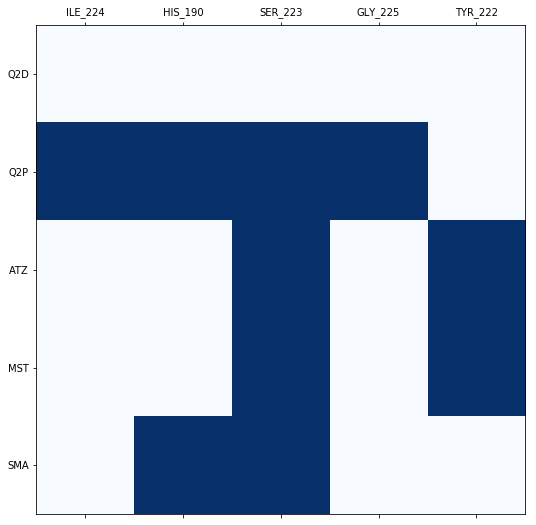

In [50]:
#taking in consideration the offset in residues numeration
last_hbs = ["{1}_{0}".format(x[0], x[1]) for x in hbs]
last_hc = ["{1}_{0}".format(x[0], x[1]) for x in hc]

#y axis label, the name of the ligand
compounds = ['SMA','MST','ATZ', 'Q2P', 'Q2D']

#plot the features presence matrix
#firstly for hbonds
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
intersection_matrix = narray_hbs
ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(narray_hbs.shape[1]), minor=False)
ax.set_yticks(np.arange(narray_hbs.shape[0]), minor=False)
ax.invert_yaxis()

#labels
ax.set_xticklabels(last_hbs, minor=False)
ax.set_yticklabels(compounds, minor=False)
plt.show()

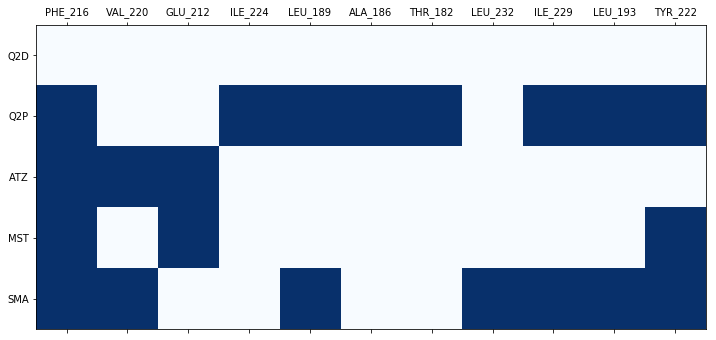

In [51]:
#then for hydrophobic contacts
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
intersection_matrix = narray_hc
ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(narray_hc.shape[1]), minor=False)
ax.set_yticks(np.arange(narray_hc.shape[0]), minor=False)
ax.invert_yaxis()

#labels
ax.set_xticklabels(last_hc, minor=False)
ax.set_yticklabels(compounds, minor=False)
plt.show()

In [52]:
hbonds_q2d

[]

In [53]:
hydrophobic_q2d

[]

In [64]:
protein_atoms, ligand_atoms, strict = hbonds(protein_2J8C, Q2D, cutoff=4, tolerance=50)

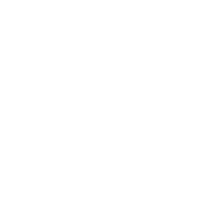

In [72]:
Q2D